In [27]:
# Do the imports
import matplotlib.pyplot as plt
%matplotlib inline
import http.client
from urllib.parse import urlencode, quote
import time
import datetime
from hashlib import sha1
import random
import string
import os
import sys
import urllib as ul
import json
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd

#plt.style.use('..\old-style.mplstyle')
plt.style.use('tableau-colorblind10')

In [28]:
district =      ['Stockholm innerstad']
#district =      ['Tegefjäll']
#district =      ['Östersund']
#district =      ['Åre']
#district =      ['Åre', 'Östersund']
#district =      ['Stockholm innerstad']
startDate =     '2022-01-01'
endDate =       datetime.datetime.now().strftime('%Y-%m-%d')
callerId =      'hjartarson'

fileObject = open("booli_api.txt", "r")
privateKey = fileObject.read()

#minLivingArea = 50
#maxLivingArea = 70

In [29]:
# Must have Booli authentification 
timestamp = str(int(time.time()))
unique = ''.join(random.choice(string.ascii_uppercase + string.digits) for x in range(16))
hashstr = sha1((callerId+timestamp+privateKey+unique).encode('utf-8')).hexdigest()

In [30]:
connection = http.client.HTTPConnection("api.booli.se")
result = []
limit = 1000
for dist in district:
    print('Collect data for: ', dist)
    MO = True
    objects = 0
    offset = 0
    while MO==True:
        print('limit:', limit, 'offset: ',offset)
        url = ("/sold?q="+quote(dist)+"&"
               #"/listings?q="+quote(dist)+"&"
               "minSoldDate="+startDate+"&"
               "maxSoldDate="+endDate+"&"
               #"minListingDate="+startDate+"&"
               #"maxListingDate="+endDate+"&"
               #"minLivingArea="+str(minLivingArea)+"&"
               #"maxLivingArea="+str(maxLivingArea)+"&"
               "limit="+str(limit)+"&"+
               "offset="+str(offset)+"&"
               "callerId="+callerId+"&time="+timestamp+"&unique="+unique+"&hash="+hashstr)
        connection.request("GET", url)
        response = connection.getresponse()
        if response.status != 200:
            print("fail")
        else:
            data = response.read().decode('utf8')
            result.append(json.loads(data))
            print('objects added:', result[-1]['count'])
        objects = objects + limit
        if objects > result[-1]['totalCount']:
            MO=False
            print('all objects added: ',len(result), ', totalCount: ',result[-1]['totalCount'])
        else:
            print('adjusting offset')
            offset = offset + limit
            time.sleep(0.2)
connection.close()

Collect data for:  Stockholm innerstad
limit: 1000 offset:  0
objects added: 1000
adjusting offset
limit: 1000 offset:  1000
objects added: 1000
adjusting offset
limit: 1000 offset:  2000
objects added: 1000
adjusting offset
limit: 1000 offset:  3000
objects added: 1000
adjusting offset
limit: 1000 offset:  4000
objects added: 1000
adjusting offset
limit: 1000 offset:  5000
objects added: 1000
adjusting offset
limit: 1000 offset:  6000
objects added: 1000
adjusting offset
limit: 1000 offset:  7000
objects added: 1000
adjusting offset
limit: 1000 offset:  8000
objects added: 1000
adjusting offset
limit: 1000 offset:  9000
objects added: 1000
adjusting offset
limit: 1000 offset:  10000
objects added: 1000
adjusting offset
limit: 1000 offset:  11000
objects added: 1000
adjusting offset
limit: 1000 offset:  12000
objects added: 108
all objects added:  13 , totalCount:  12108


In [31]:
#reslistings

In [32]:
#listings

# Merge all data into one dataframe
df = pd.DataFrame()
for res in result:
    df1 = pd.DataFrame(res['sold'])
    df = pd.concat([df, df1])
df = df.set_index('booliId',drop=False)
df.info()
print('\nBooliId is an unique index:',df.index.is_unique)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12108 entries, 4760779 to 4483173
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             12108 non-null  object 
 1   rooms              12067 non-null  float64
 2   constructionYear   10925 non-null  float64
 3   soldDate           12108 non-null  object 
 4   additionalArea     6493 non-null   float64
 5   location           12108 non-null  object 
 6   rent               11878 non-null  float64
 7   livingArea         12072 non-null  float64
 8   soldPriceSource    12108 non-null  object 
 9   listPrice          10952 non-null  float64
 10  soldPrice          12108 non-null  int64  
 11  booliId            12108 non-null  int64  
 12  floor              11154 non-null  float64
 13  objectType         12108 non-null  object 
 14  published          11941 non-null  object 
 15  url                12108 non-null  object 
 16  apartmentNumbe

In [33]:
df.tail(1).T

booliId,4483173
source,"{'id': 1314, 'url': 'https://www.esny.se/', 't..."
rooms,2.0
constructionYear,NaN
soldDate,2022-01-01
additionalArea,NaN
location,"{'position': {'latitude': 59.32513342, 'longit..."
rent,2635.0
livingArea,44.0
soldPriceSource,bobot
listPrice,5500000.0


In [34]:
# Merge all data into one dataframe
df = pd.DataFrame()
for res in result:
    df1 = pd.DataFrame(res['sold'])
    df = pd.concat([df, df1])
df = df.set_index('booliId',drop=False)
df_copy = df.copy()
df.info()
print('\nBooliId is an unique index:',df.index.is_unique)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12108 entries, 4760779 to 4483173
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             12108 non-null  object 
 1   rooms              12067 non-null  float64
 2   constructionYear   10925 non-null  float64
 3   soldDate           12108 non-null  object 
 4   additionalArea     6493 non-null   float64
 5   location           12108 non-null  object 
 6   rent               11878 non-null  float64
 7   livingArea         12072 non-null  float64
 8   soldPriceSource    12108 non-null  object 
 9   listPrice          10952 non-null  float64
 10  soldPrice          12108 non-null  int64  
 11  booliId            12108 non-null  int64  
 12  floor              11154 non-null  float64
 13  objectType         12108 non-null  object 
 14  published          11941 non-null  object 
 15  url                12108 non-null  object 
 16  apartmentNumbe

In [35]:
df['soldDate'] = pd.to_datetime(df['soldDate'])
df['soldPriceSqm'] = df['soldPrice'].div(df['livingArea'])
df.loc[:,'soldMonth'] = df.loc[:,'soldDate'].dt.to_period('M')
df.loc[:,'soldPriceSqm'] = df.loc[:,'soldPrice']/df.loc[:,'livingArea']
df.loc[:,'listPriceSqm'] = df.loc[:,'listPrice']/df.loc[:,'livingArea']

#df.to_pickle('osd.pkl')

soldDate
2023-03-06    105.643872
2023-03-07    105.818225
2023-03-08    105.358461
2023-03-09    105.448971
2023-03-10    105.477784
2023-03-11    105.513571
2023-03-12    104.847505
2023-03-13    105.122257
2023-03-14    105.187066
2023-03-15    104.537989
Name: soldPriceSqm, dtype: float64
soldDate
2023-03-06    27.857143
2023-03-07    27.714286
2023-03-08    26.285714
2023-03-09    25.285714
2023-03-10    24.857143
2023-03-11    24.571429
2023-03-12    24.642857
2023-03-13    24.285714
2023-03-14    23.785714
2023-03-15    21.571429
Name: soldPriceSqm, dtype: float64


Text(0, 0.5, 'sqm price [ksek]')

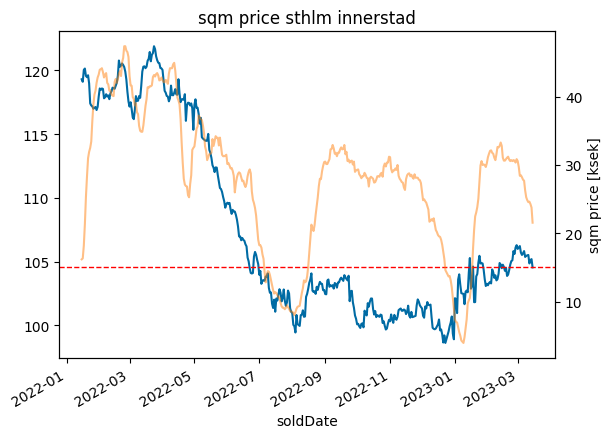

In [37]:
days = 14
f, ax = plt.subplots()

df_cell = df[(df['objectType']=='Lägenhet') & (df['soldDate']>'2016-01-01')].groupby(['soldDate'])['soldPriceSqm'].mean().mul(1e-3).rolling(days).mean()#.iloc[:-1]
#df_cell = df_cell.div(df_cell.loc['2021-07-20'])
ax = df_cell.plot(ax=ax, title='sqm price sthlm innerstad')
ax.axhline(df_cell.iloc[-1], ls='--', lw=1, c='r')
#ax.axhline(120, ls='--', lw=2, c='r')
print(df_cell.tail(10))
df_cell = df[(df['objectType']=='Lägenhet') & (df['soldDate']>'2016-01-01')].groupby(['soldDate'])['soldPriceSqm'].count().rolling(days).mean()#.iloc[:-1]
ax = df_cell.plot(ax=ax, secondary_y = True, alpha = 0.5)
print(df_cell.tail(10))
ax.set_ylabel('sqm price [ksek]')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11986 entries, 4428976 to 4483173
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   source             11986 non-null  object        
 1   rooms              11945 non-null  float64       
 2   constructionYear   10817 non-null  float64       
 3   soldDate           11986 non-null  datetime64[ns]
 4   location           11986 non-null  object        
 5   rent               11766 non-null  float64       
 6   livingArea         11956 non-null  float64       
 7   soldPriceSource    11986 non-null  object        
 8   listPrice          10855 non-null  float64       
 9   soldPrice          11986 non-null  int64         
 10  booliId            11986 non-null  int64         
 11  floor              11048 non-null  float64       
 12  objectType         11986 non-null  object        
 13  published          11821 non-null  object        
 14

soldDate
2023-03-01    107.070080
2023-03-02    107.279360
2023-03-03    107.363325
2023-03-04    106.617111
2023-03-05    106.221913
2023-03-06    106.451525
2023-03-07    106.594478
2023-03-08    106.448798
2023-03-09    106.629249
2023-03-10    105.294076
Name: soldPriceSqm, dtype: float64
soldDate
2023-03-01    11.321429
2023-03-02    11.142857
2023-03-03    10.821429
2023-03-04    10.892857
2023-03-05    10.857143
2023-03-06    10.750000
2023-03-07    10.714286
2023-03-08    10.250000
2023-03-09    10.107143
2023-03-10     9.535714
Name: soldPriceSqm, dtype: float64


Text(0, 0.5, 'sqm price [ksek]')

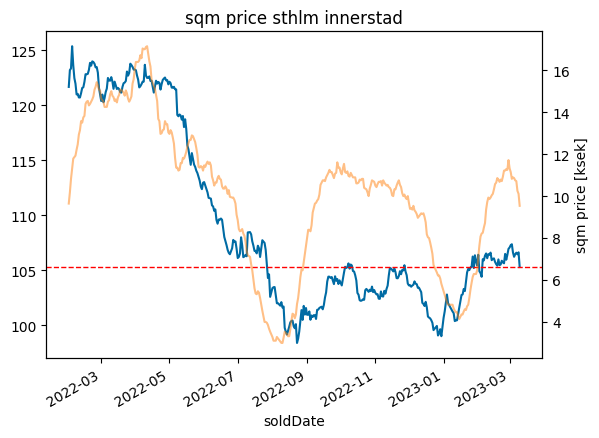

In [12]:
days = 28
f, ax = plt.subplots()

df_filt = df[(df['objectType']=='Lägenhet') & (df['soldDate']>'2016-01-01') & (df['rooms']>2)]
df_cell = df_filt.groupby(['soldDate'])['soldPriceSqm'].mean().mul(1e-3).rolling(days).mean()#.iloc[:-1]
#df_cell = df_cell.div(df_cell.loc['2021-07-20'])
ax = df_cell.plot(ax=ax, title='sqm price sthlm innerstad')
ax.axhline(df_cell.iloc[-1], ls='--', lw=1, c='r')
#ax.axhline(120, ls='--', lw=2, c='r')
print(df_cell.tail(10))
df_cell = df_filt.groupby(['soldDate'])['soldPriceSqm'].count().rolling(days).mean()#.iloc[:-1]
ax = df_cell.plot(ax=ax, secondary_y = True, alpha = 0.5)
print(df_cell.tail(10))
ax.set_ylabel('sqm price [ksek]')